In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train['Dataset'] = 'Train'
df_test['Dataset'] = 'Test'
df = pd.concat([df_train, df_test], ignore_index=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Dataset      1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


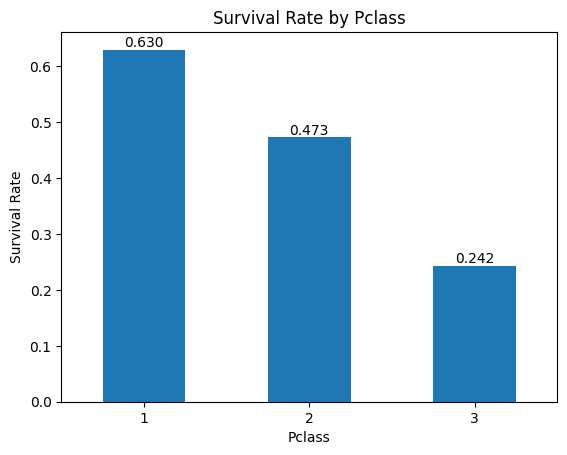

In [3]:
#visualize
#Pclass
pclass_survival = df.groupby('Pclass')['Survived'].mean()
ax = pclass_survival.plot(kind='bar')
plt.title('Survival Rate by Pclass')
plt.ylabel('Survival Rate')
plt.xlabel('Pclass')
for index, value in enumerate(pclass_survival):
    ax.text(index, value, f'{value:.3f}', ha='center', va='bottom')
plt.xticks(rotation=0)
plt.show()

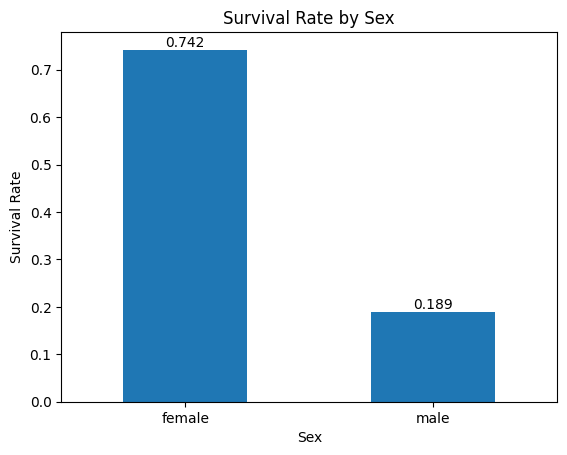

In [4]:
#Sex
sex_survival = df.groupby('Sex')['Survived'].mean()
ax = sex_survival.plot(kind='bar')
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.xlabel('Sex')
for index, value in enumerate(sex_survival):
    ax.text(index, value, f'{value:.3f}', ha='center', va='bottom')
plt.xticks(rotation=0)
plt.show()

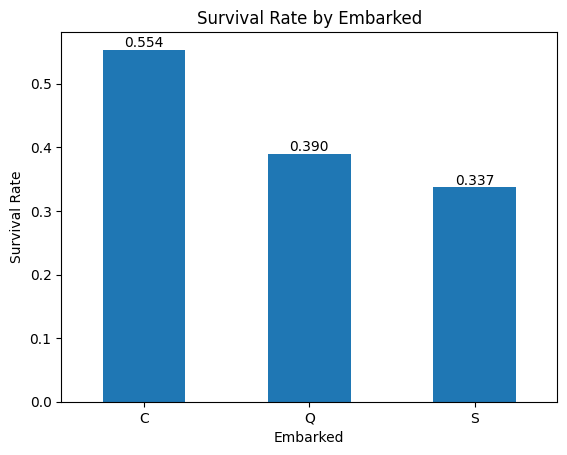

In [5]:
#Embarked
Embarked_survival = df.groupby('Embarked')['Survived'].mean()
ax = Embarked_survival.plot(kind='bar')
plt.title('Survival Rate by Embarked')
plt.ylabel('Survival Rate')
plt.xlabel('Embarked')
for index, value in enumerate(Embarked_survival):
    ax.text(index, value, f'{value:.3f}', ha='center', va='bottom')
plt.xticks(rotation=0)
plt.show()

posx and posy should be finite values
posx and posy should be finite values


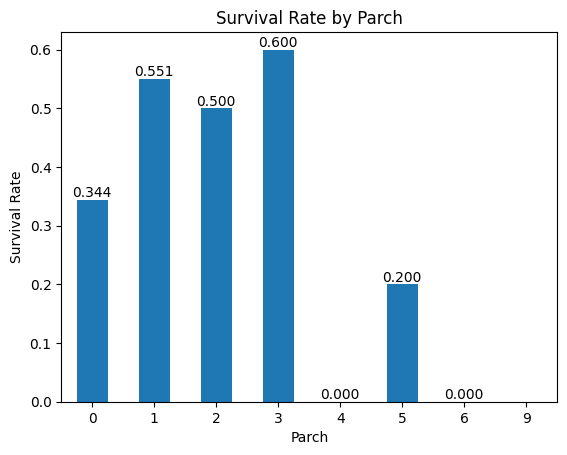

In [6]:
#Parch
Parch_survival = df.groupby('Parch')['Survived'].mean()
ax = Parch_survival.plot(kind='bar')
plt.title('Survival Rate by Parch')
plt.ylabel('Survival Rate')
plt.xlabel('Parch')
for index, value in enumerate(Parch_survival):
    ax.text(index, value, f'{value:.3f}', ha='center', va='bottom')
plt.xticks(rotation=0)
plt.show()

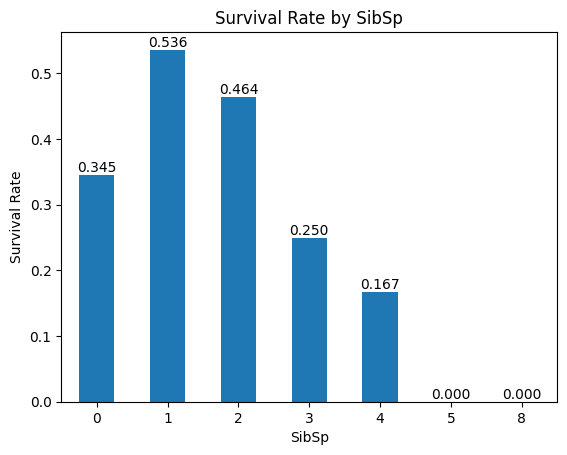

In [7]:
#SibSp
SibSp_survival = df.groupby('SibSp')['Survived'].mean()
ax = SibSp_survival.plot(kind='bar')
plt.title('Survival Rate by SibSp')
plt.ylabel('Survival Rate')
plt.xlabel('SibSp')
for index, value in enumerate(SibSp_survival):
    ax.text(index, value, f'{value:.3f}', ha='center', va='bottom')
plt.xticks(rotation=0)
plt.show()

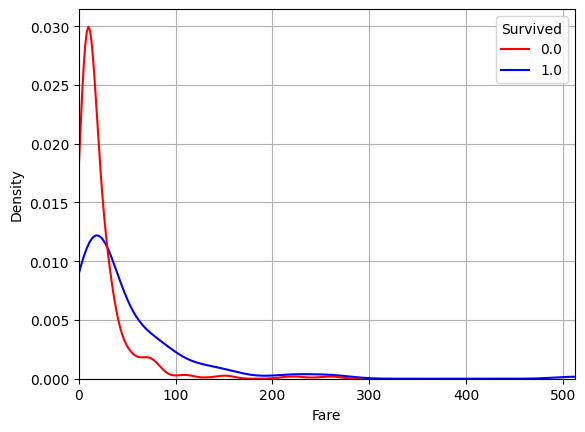

In [8]:
sns.kdeplot(data=df, x="Fare", hue="Survived", common_norm=False, palette={0: "red", 1: "blue"})
plt.grid()
plt.xlim(df['Fare'].min(), df['Fare'].max())
plt.show()

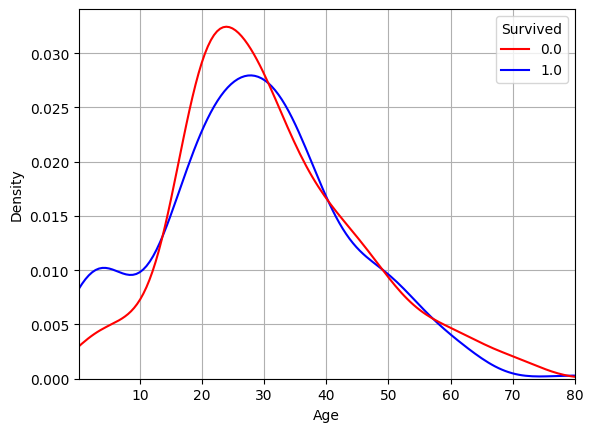

In [9]:
sns.kdeplot(data=df, x="Age", hue="Survived", common_norm=False, palette={0: "red", 1: "blue"})
plt.grid()
plt.xlim(df['Age'].min(), df['Age'].max())
plt.show()

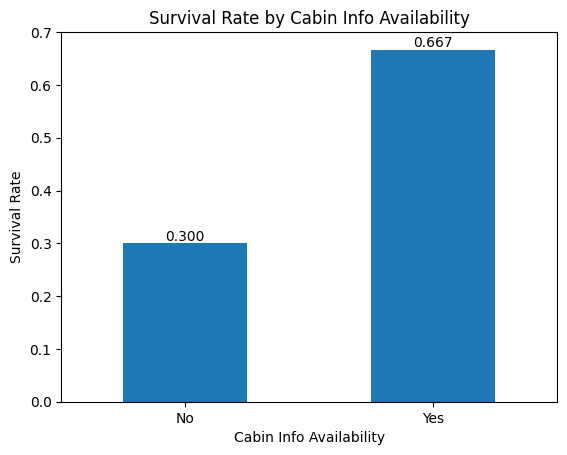

In [10]:
df['Cabin'] = df['Cabin'].notna()
cabin_survival = df.groupby(df['Cabin'])['Survived'].mean()

ax = cabin_survival.plot(kind='bar')
plt.title('Survival Rate by Cabin Info Availability')
plt.ylabel('Survival Rate')
plt.xlabel('Cabin Info Availability')
plt.xticks(ticks=[1, 0], labels=['Yes', 'No'], rotation=0)

for index, value in enumerate(cabin_survival):
    ax.text(index, value, f'{value:.3f}', ha='center', va='bottom')

plt.show()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64
TitleGroup
Mr        757
Miss      264
Mrs       198
Master     61
Crew       23
Noble       6
Name: count, dtype: int64


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Crew'),
  Text(1, 0, 'Master'),
  Text(2, 0, 'Miss'),
  Text(3, 0, 'Mr'),
  Text(4, 0, 'Mrs'),
  Text(5, 0, 'Noble')])

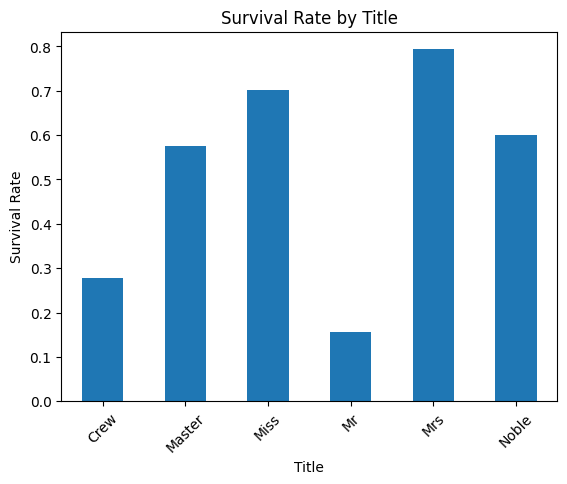

In [11]:
def extract_title(name):
    match = re.search(r'([A-Za-z]+)\.', name)
    if match:
        return match.group(1)
    return 'Other'

df['Title'] = df['Name'].apply(extract_title)
print(df['Title'].value_counts())

grouped_titles = {
    "Mr": ["Mr"],
    "Mrs": ["Mrs","Mme"],
    "Master":["Master"],
    "Miss": ["Miss","Ms","Mlle"],
    "Crew": ["Dr", "Rev", "Col", "Major", "Capt"],
    "Noble": ["Lady", "Sir", "Countess", "Jonkheer", "Don", "Dona" ]
}

def categorize_title(title):
    for group, titles in grouped_titles.items():
        if title in titles:
            return group

df["TitleGroup"] = df["Title"].apply(categorize_title)

print(df['TitleGroup'].value_counts())

title_survival = df.groupby('TitleGroup')['Survived'].mean()

ax = title_survival.plot(kind='bar')
plt.title('Survival Rate by Title')
plt.ylabel('Survival Rate')
plt.xlabel('Title')
plt.xticks(rotation=45)

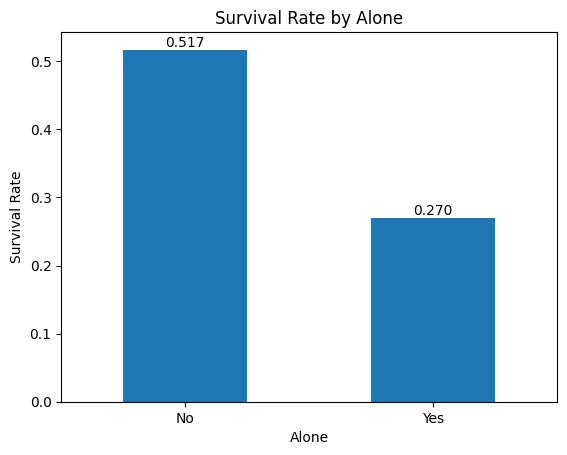

In [12]:
#Ticket
ticket_counts = df["Ticket"].value_counts()

df["Alone"] = df["Ticket"].map(ticket_counts == 1)

Alone_survival = df.groupby(df['Alone'])['Survived'].mean()

ax = Alone_survival.plot(kind='bar')
plt.title('Survival Rate by Alone')
plt.ylabel('Survival Rate')
plt.xlabel('Alone')
plt.xticks(ticks=[1, 0], labels=['Yes', 'No'], rotation=0)

for index, value in enumerate(Alone_survival):
    ax.text(index, value, f'{value:.3f}', ha='center', va='bottom')

plt.show()


In [13]:
# Preprocessing
# Fill missing values
mean_age_by_group = df.groupby("TitleGroup")["Age"].mean()
print(mean_age_by_group)
df["Age"] = df["Age"].fillna(df.groupby("TitleGroup")["Age"].transform("mean"))

df['Fare']=df['Fare'].fillna(df['Fare'].median())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])



TitleGroup
Crew      46.272727
Master     5.482642
Miss      21.824366
Mr        32.252151
Mrs       36.918129
Noble     41.166667
Name: Age, dtype: float64


In [ ]:
# One-hot encoding
df=df.join(pd.get_dummies(df['Pclass'],prefix='Pclass').astype(float))
df=df.join(pd.get_dummies(df['Sex'],prefix='Sex').astype(float))
df=df.join(pd.get_dummies(df['Embarked'],prefix='Embarked').astype(float))
df=df.join(pd.get_dummies(df['TitleGroup'],prefix='TitleGroup').astype(float))
df=df.join(pd.get_dummies(df['Alone'],prefix='Alone').astype(float))
df=df.join(pd.get_dummies(df['Cabin'],prefix='Cabin').astype(float))

df.drop(['Pclass', 'Sex', 'Embarked','TitleGroup','Title','Name',"Ticket",'Alone','Cabin'], axis=1, inplace=True)

# norm
df['Fare'] = np.log(df['Fare']+1)
scaler = MinMaxScaler()
df[['Age', 'SibSp', 'Parch', 'Fare']] = scaler.fit_transform(df[['Age', 'SibSp', 'Parch', 'Fare']])

# seperate train and test
df_train = df[df['Dataset'] == 'Train'].drop('Dataset', axis=1)
df_test = df[df['Dataset'] == 'Test'].drop('Dataset', axis=1)

# Select relevant features and target variable for training
features = [col for col in df.columns if col not in ["PassengerId", "Survived","Dataset"]]
x = df_train[features]
y = df_train['Survived']
x.info()
passenger_ids = df_test['PassengerId']
x_test = df_test[features]

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                891 non-null    float64
 1   SibSp              891 non-null    float64
 2   Parch              891 non-null    float64
 3   Fare               891 non-null    float64
 4   Pclass_1           891 non-null    float64
 5   Pclass_2           891 non-null    float64
 6   Pclass_3           891 non-null    float64
 7   Sex_female         891 non-null    float64
 8   Sex_male           891 non-null    float64
 9   Embarked_C         891 non-null    float64
 10  Embarked_Q         891 non-null    float64
 11  Embarked_S         891 non-null    float64
 12  TitleGroup_Crew    891 non-null    float64
 13  TitleGroup_Master  891 non-null    float64
 14  TitleGroup_Miss    891 non-null    float64
 15  TitleGroup_Mr      891 non-null    float64
 16  TitleGroup_Mrs     891 non-null